In [8]:
import os
from glob import glob 

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!unzip -qq /content/drive/"My Drive"/"[AOP:딥러닝 인공지능]"/TEST/"1. [Tensorflow 2.0 과 Pytorch]"/"3. 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch"/"3. dataset"/cifar.zip


In [12]:
data_paths = glob('/content/cifar/train/*.png')

In [13]:
data_paths.sort() # 강의와 동일한 실습을 위해 정렬

In [14]:
path = data_paths[0] # 예시로 하나 추출
path


'/content/cifar/train/0_frog.png'

In [15]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile, dtype=tf.float32)

image.shape

TensorShape([32, 32, 3])

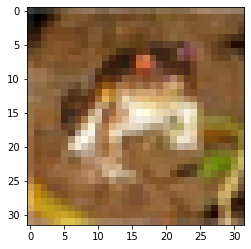

In [16]:
plt.imshow(image)
plt.show()

In [17]:
def read_image(path):
  gfile = tf.io.read_file(path)
  image = tf.io.decode_image(gfile, dtype=tf.float32)
  return image

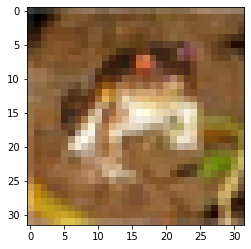

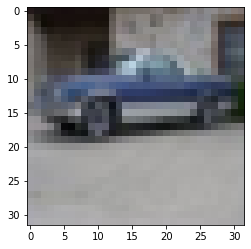

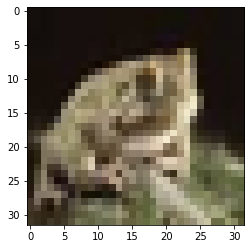

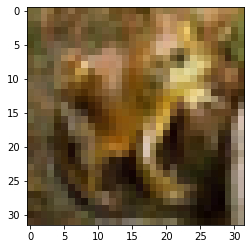

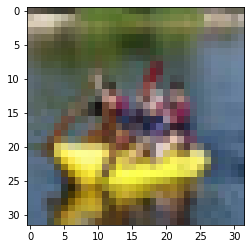

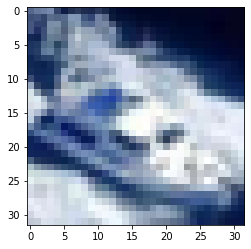

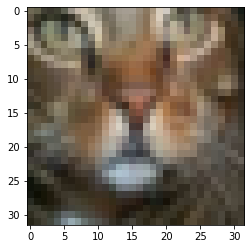

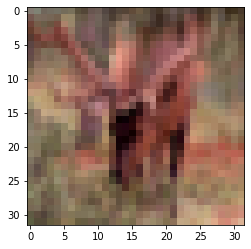

In [18]:
for i in range(8):
  plt.imshow(read_image(data_paths[i])) 
  plt.show()

# Batch

![image.png](attachment:image.png)

## Images in List

In [19]:
batch_images=[]

In [20]:
for path in data_paths[:8]:
  image = read_image(path)
  #image = cv2.resize(image, (32,32)) -> 이미지 사이즈가 다르면 통일시켜줘야 함.
  batch_images.append(image)

In [21]:
len(batch_images)

8

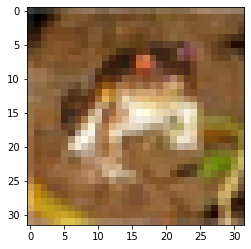

In [22]:
plt.imshow(batch_images[0])
plt.show()

In [23]:
image.shape

TensorShape([32, 32, 3])

In [24]:
np.array(batch_images).shape # 이미지가 8장

(8, 32, 32, 3)

In [25]:
batch = tf.convert_to_tensor(batch_images)

In [26]:
batch.shape

TensorShape([8, 32, 32, 3])

![batch%20list.JPG](attachment:batch%20list.JPG)

In [ ]:
# (batch_size, height, width, channel)

In [28]:
# 위 내용 정리하여 함수로 구현
def make_batch(batch_paths):
  batch_images = []

  for path in batch_paths:
    image = read_image(path)
    #image = cv2.resize(image, (32,32))
    batch_images.append(image)

  return tf.convert_to_tensor(batch_images)

In [29]:
batch_images = make_batch(data_paths[:8])

In [30]:
batch_images.shape

TensorShape([8, 32, 32, 3])

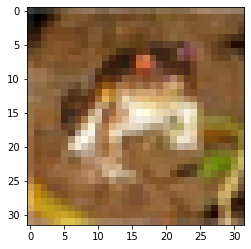

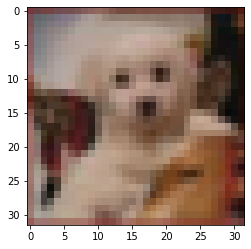

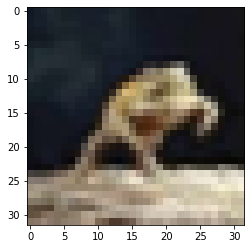

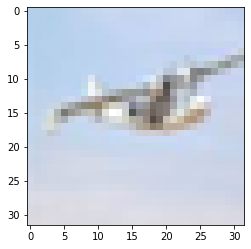

In [31]:
# 배치 반복 생성
batch_size = 16

for step in range(4):
  batch_images = make_batch(data_paths[step * batch_size : (step + 1) * batch_size])

  plt.imshow(batch_images[0])
  plt.show()

# Batch Size

![dims.jpg](attachment:dims.jpg)